In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Los datos tienen la cantidad de loves y angrys para cada publicación de facebook de medios de comunicación por un año
fan_status = pd.read_csv("../Data/156057357762712_facebook_statuses.csv")

In [95]:
#Crear columna para día de la semana
fan_status["weekday"] = pd.DatetimeIndex(fan_status["status_published"]).weekday;
fan_status["weekday_name"] = pd.DatetimeIndex(fan_status["status_published"]).weekday_name;

#Crear columna para hora del día
fan_status["hour"] = pd.DatetimeIndex(fan_status["status_published"]).hour;

#Normalizar el valor de los loves
#A la diferencia entre el número de cada valor se le resta la mediana
#esto se divide por la diferencia entre el valor máximo y el mínimo (lo que debería dar de -1 a 1)
fan_status["loves"] = (fan_status["num_loves"] - fan_status["num_loves"].mean()) / (fan_status["num_loves"].max() - fan_status["num_loves"].min()) 

#Normalizar angrys
fan_status["angrys"] = (fan_status["num_angrys"] - fan_status["num_angrys"].mean()) / (fan_status["num_angrys"].max() - fan_status["num_angrys"].min()) 

#Calcular un humor para cada estado, sumando los loves y los angrys normalizados
fan_status["mood"] = (fan_status["loves"])+(fan_status["angrys"]);

In [96]:
#Crear tablas pivot
mood = pd.pivot_table(fan_status, values="mood",index="weekday",columns="hour");
loves = pd.pivot_table(fan_status, values="loves",index="weekday",columns="hour");
angrys = pd.pivot_table(fan_status, values="angrys",index="weekday",columns="hour");
loves

hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
weekday,,,,,,,,,,,,,,,,,,,,,
0.0,-0.002782,-0.001555,-0.001788,-0.002122,-0.003265,-0.000692,0.001835,-0.002889,0.002895,0.001213,...,0.002807,0.000185,0.003532,0.000596,-0.000052,-0.000494,-0.002196,-0.001000,-0.000913,-0.001373
1.0,-0.002234,-0.003757,-0.002784,-0.002026,-0.002464,-0.003635,-0.002358,-0.002633,0.001203,0.002971,...,0.003808,-0.000745,0.004866,0.000982,0.003280,-0.001561,-0.001527,-0.001763,-0.001831,-0.003338
2.0,-0.000489,-0.001484,-0.002645,-0.001644,-0.003001,0.001098,0.000881,0.002464,-0.001996,0.000397,...,0.000518,0.003703,0.004775,0.003247,0.002277,0.000311,-0.001734,-0.002557,-0.000154,0.000699
3.0,-0.002388,-0.002858,-0.004088,0.000120,-0.003440,-0.003315,-0.001516,-0.000851,-0.000539,0.001574,...,-0.001127,-0.000640,0.005311,0.003800,0.002503,-0.001639,0.000676,-0.000781,-0.002675,-0.002109
4.0,-0.002601,-0.003687,-0.002911,-0.003749,-0.003813,-0.004006,-0.002698,-0.003101,-0.002384,0.001060,...,0.001617,0.000823,0.001828,-0.002985,0.001094,-0.002992,-0.002528,-0.002164,-0.001877,-0.002521
5.0,-0.001893,0.002839,-0.001732,-0.002555,-0.002561,-0.002028,-0.001888,-0.002011,-0.001246,-0.001509,...,-0.000225,0.006037,0.005024,-0.000313,-0.000890,-0.001787,-0.002224,-0.001976,-0.001368,-0.002648
6.0,-0.003177,-0.002040,0.001973,-0.003169,-0.002334,0.000113,0.004987,0.000940,-0.001550,0.002244,...,0.001669,0.000443,0.003330,0.001457,-0.000098,0.000692,-0.000047,0.000763,0.001942,0.003025


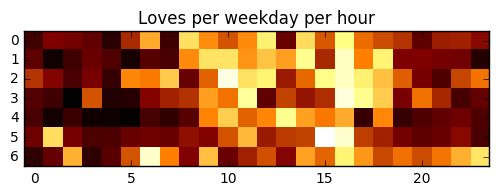

In [82]:
fix,ax = plt.subplots();
ax.imshow(loves, cmap=plt.cm.afmhot, interpolation='nearest')
ax.set_title('Loves per weekday per hour')
plt.show()

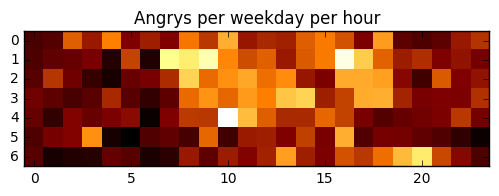

In [83]:
fix,ax = plt.subplots();
ax.imshow(angrys, cmap=plt.cm.afmhot, interpolation='nearest')
ax.set_title('Angrys per weekday per hour')
plt.show()

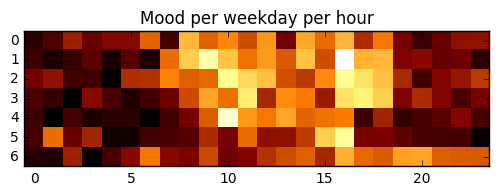

In [93]:
fix,ax = plt.subplots();
ax.imshow(mood, cmap=plt.cm.afmhot, interpolation='nearest')
ax.set_title('Mood per weekday per hour')
plt.show()